**Корректность проверена на Python 3.7:**
+ numpy 1.18.1
+ pandas 1.0.3
+ matplotlib 3.1.3
+ sklearn 0.22.1
+ xgboost 0.90

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings
%matplotlib inline

# Анализ данных

In [2]:
df = pd.read_csv('task2.txt', sep="\t", header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.155051,0.974187,0.074675,0.442146,0.369443,0.468138,0.578846,0.422744,0.931543,0.474148,15
1,0.968379,0.716820,0.678846,0.510049,0.545299,0.573692,0.817491,0.206636,0.880111,0.574187,17
2,0.468263,0.405603,0.320325,0.468084,0.100995,0.974407,0.300062,0.608356,0.050082,0.762011,12
3,0.776820,0.103740,0.373748,0.797782,0.906810,0.599069,0.626680,0.924705,0.632768,0.512663,16
4,0.407886,0.415357,0.101543,0.935160,0.444124,0.193607,0.656837,0.599929,0.868582,0.405406,20


Проверим наличие пропусков

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1000 non-null   float64
 1   1       1000 non-null   float64
 2   2       1000 non-null   float64
 3   3       1000 non-null   float64
 4   4       1000 non-null   float64
 5   5       1000 non-null   float64
 6   6       1000 non-null   float64
 7   7       1000 non-null   float64
 8   8       1000 non-null   float64
 9   9       1000 non-null   float64
 10  10      1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


Построим графики, чтобы оценить зависимость целевого признака от остальных

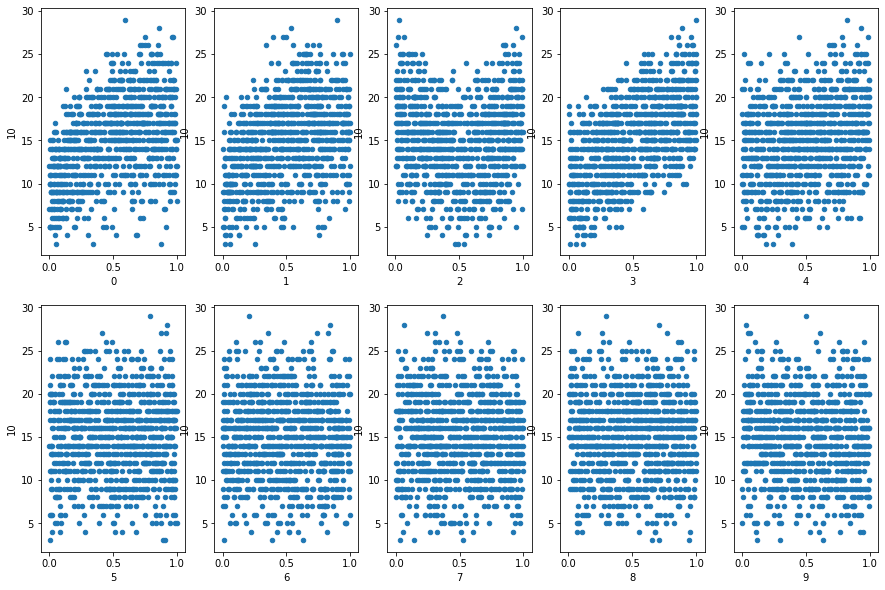

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 10))
for idx, feature in enumerate(df.columns[:-1]):
    df.plot(feature, 10, subplots=True, kind="scatter", ax=axes[idx // 5, idx % 5])

Из графиков видно что признаки 0, 1, 3, 4 линейно зависят от целевого признака. Рассчитаем корреляцию Пирсона, чтобы удостовериться в этом:

In [6]:
df[df.columns[:-1]].corrwith(df[df.columns[-1]])

0    0.429990
1    0.370141
2   -0.008855
3    0.559228
4    0.252266
5   -0.005472
6   -0.028012
7    0.001281
8   -0.018830
9   -0.062788
dtype: float64

В выборке есть признаки, коррелирующие с целевым, а значит, задачу можно решать линейными методами.
Проверим масштаб признаков:

In [7]:
df.mean()

0      0.490491
1      0.499785
2      0.496466
3      0.503167
4      0.508902
5      0.513466
6      0.487111
7      0.498870
8      0.505611
9      0.499113
10    15.014000
dtype: float64

In [8]:
data = df[df.columns[:-1]]
target = df[df.columns[-1]]

In [9]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(data, target)
print(linear_regression.coef_)
list(zip(data.columns, linear_regression.coef_))

[ 7.27672965e+00  6.67876858e+00 -2.54862788e-01  9.71509423e+00
  5.15213723e+00  9.94432729e-02 -1.82749998e-01 -6.96572954e-03
 -1.47143689e-01 -3.35640844e-01]


[(0, 7.276729650802523),
 (1, 6.678768582731812),
 (2, -0.2548627876882685),
 (3, 9.715094233593183),
 (4, 5.152137226892063),
 (5, 0.09944327289013336),
 (6, -0.1827499977397639),
 (7, -0.006965729542809558),
 (8, -0.14714368903535116),
 (9, -0.33564084403843486)]

В результате обучения модели линейной регрессии веса получились незначительными, что означает отсутствие переобучения. Также по значениям весов можно сделать вывод, что признак "3" - самый информативный, признаки "0","1","4" - чуть менее информативны, а остальные признаки вносят несущественный вклад в построение модели.
Т.к. целевая переменная имеет относительно малые значения ~15, в качестве метрики будем использовать "r2". Для оценки моделей будем использовать кроссвалидацию на 3 фолда.

# Построение модели

In [10]:
from sklearn.model_selection import cross_val_score
cross_val_score(LinearRegression(), data, target, cv=3, scoring='r2').mean()

0.733087966025234

Регрессия с помощью решающих деревьев

0.65233707013483


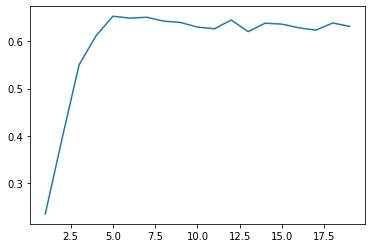

In [11]:
from sklearn import tree
score = []
for i in range(1, 20):
    regresor = tree.DecisionTreeRegressor(max_depth=i, random_state=i)
    score.append(cross_val_score(regresor, data, target, cv=3, scoring='r2').mean())
plt.plot(np.array([i for i in range(1, 20)]), score)
print(max(score))

Регрессия с помощью градиентного бустинга

[22:25:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:25:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:25:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:25:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:25:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:25:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:25:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:25:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:25:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

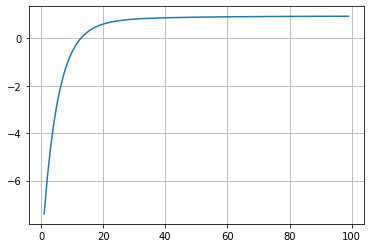

In [12]:
import xgboost as xgb
n_trees = np.array([ i for i in range(1, 100)])
score = []
for i in n_trees:
    boost = xgb.XGBRegressor(n_estimators=i)
    score.append(cross_val_score(boost, data, target, cv=3, scoring='r2').mean())
plt.plot(n_trees, score)
plt.grid()
plt.show()

[22:26:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:26:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:26:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:26:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:26:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:26:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:26:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:26:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:26:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

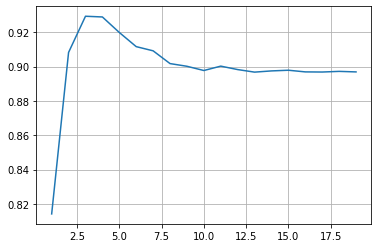

In [13]:
max_depth = np.array([i for i in range(1, 20)])
score = []
for i in max_depth:
    boost = xgb.XGBRegressor(max_depth=i)
    score.append(cross_val_score(boost, data, target, cv=3, scoring='r2').mean())
plt.plot(max_depth, score)
plt.grid()
plt.show()

В результате оптимальная модель для данной задачи - XGBRegressor с глубиной деревьев до 3

In [14]:
cross_val_score(xgb.XGBRegressor(max_depth=3), data, target, cv=3, scoring='neg_mean_squared_error').mean()

[22:26:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:26:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:26:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


-1.60649166525841